# First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Information
Fill out the following information: 

*First Name:* Luis <br> 
*Last Name:* Garcia   
*E-mail:* garcial96ca@gmail.com

In [1]:
# imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and/or Homework 2 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [3]:
# initialize the top-level array
movies = []

with open('movies.csv') as csvfile:
    # note that we can interchangably use ' and " in general
    # for the quotechar, however we use ' so that we can use " without escaping
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"') # dlimiters and quotechars takes care of quotes and 
    # the row here is an array
    for row in filereader:
        print("Row: " + str(row))
        movies.append(row)

# Store the header in a separate array
header = movies.pop(0) # removes the top element of the list

print(movies)

Row: ['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
Row: ['1', '$', '1971', '121', 'NA', '6.4', '348', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0']
Row: ['2', '$1000 a Touchdown', '1939', '71', 'NA', '6', '20', '0', '14.5', '4.5', '24.5', '14.5', '14.5', '14.5', '4.5', '4.5', '14.5', '', '0', '0', '1', '0', '0', '0', '0']
Row: ['3', '$21 a Day Once a Month', '1941', '7', 'NA', '8.2', '5', '0', '0', '0', '0', '0', '24.5', '0', '44.5', '24.5', '24.5', '', '0', '1', '0', '0', '0', '0', '1']
Row: ['4', '$40,000', '1996', '70', 'NA', '8.2', '6', '14.5', '0', '0', '0', '0', '0', '0', '0', '34.5', '45.5', '', '0', '0', '1', '0', '0', '0', '0']
Row: ['5', '$50,000 Climax Show, The', '1975', '71', 'NA', '3.4', '17', '24.5', '4.5', '0', '14.5', '14.5', '4.5', '0', '0', '0

Row: ['2086', 'America 101', '2005', '86', 'NA', '9.5', '31', '4.5', '4.5', '0', '0', '0', '0', '0', '4.5', '4.5', '74.5', '', '0', '0', '1', '0', '0', '0', '0']
Row: ['2087', 'America 3000', '1986', '84', '2000000', '3.7', '123', '24.5', '4.5', '14.5', '4.5', '14.5', '4.5', '4.5', '4.5', '4.5', '24.5', '', '1', '0', '0', '0', '0', '0', '0']
Row: ['2088', 'America Is Waiting', '1981', '4', 'NA', '5.4', '19', '0', '4.5', '0', '4.5', '14.5', '34.5', '14.5', '4.5', '14.5', '14.5', '', '0', '0', '0', '0', '0', '0', '1']
Row: ['2089', 'America So Beautiful', '2001', '91', 'NA', '5.5', '40', '14.5', '4.5', '4.5', '0', '14.5', '4.5', '14.5', '4.5', '14.5', '34.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['2090', "America a Roma, L'", '1998', '78', 'NA', '8.1', '5', '0', '0', '0', '0', '0', '0', '24.5', '24.5', '64.5', '0', '', '0', '0', '0', '0', '1', '0', '0']
Row: ['2091', 'America at the Movies', '1976', '116', 'NA', '5.5', '37', '4.5', '4.5', '4.5', '4.5', '14.5', '14.5', '14.5', '4.5

Row: ['4218', 'Ballet gyoseubso', '2004', '119', 'NA', '6.8', '34', '4.5', '0', '0', '4.5', '4.5', '14.5', '24.5', '34.5', '4.5', '14.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['4219', 'Ballett ist ausgefallen', '2002', '14', 'NA', '6', '7', '0', '0', '0', '0', '0', '24.5', '0', '0', '24.5', '44.5', '', '0', '0', '0', '0', '0', '0', '1']
Row: ['4220', 'Ballistic', '1995', '96', 'NA', '4', '50', '14.5', '4.5', '4.5', '14.5', '14.5', '14.5', '4.5', '14.5', '4.5', '14.5', '', '1', '0', '0', '0', '0', '0', '0']
Row: ['4221', 'Ballistic: Ecks vs. Sever', '2002', '91', '70000000', '3.4', '4556', '24.5', '14.5', '14.5', '14.5', '14.5', '4.5', '4.5', '4.5', '4.5', '4.5', 'R', '1', '0', '0', '0', '0', '0', '0']
Row: ['4222', 'Ballo a tre passi', '2003', '107', 'NA', '6', '56', '4.5', '4.5', '0', '4.5', '24.5', '14.5', '34.5', '4.5', '4.5', '4.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['4223', "Ballon d'or, Le", '1994', '93', 'NA', '6.2', '39', '0', '0', '0', '14.5', '4.5', '34.5', '

Row: ['7035', 'Bouba', '1987', '88', 'NA', '7.1', '8', '0', '0', '0', '34.5', '24.5', '14.5', '0', '14.5', '14.5', '0', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['7036', 'Bouche de Jean-Pierre, La', '1996', '52', 'NA', '7.3', '21', '4.5', '0', '0', '4.5', '4.5', '4.5', '14.5', '44.5', '4.5', '4.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['7037', 'Boucher, Le', '1970', '93', 'NA', '7.6', '538', '4.5', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '14.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['7038', 'Boudica', '2003', '83', 'NA', '5.7', '138', '14.5', '4.5', '4.5', '14.5', '4.5', '14.5', '14.5', '14.5', '4.5', '4.5', '', '1', '0', '0', '1', '0', '0', '0']
Row: ['7039', 'Boudu', '2005', '104', 'NA', '5.8', '37', '4.5', '0', '4.5', '14.5', '4.5', '24.5', '24.5', '14.5', '0', '4.5', '', '0', '0', '1', '0', '0', '0', '0']
Row: ['7040', 'Bouge!', '1997', '99', 'NA', '2.3', '51', '44.5', '14.5', '4.5', '4.5', '14.5', '4.5', '4.5', '4.5', '4.5', '4.5', '', '0', '0'

Row: ['9668', 'Cheyenne', '1947', '99', 'NA', '6.5', '41', '0', '0', '0', '4.5', '4.5', '24.5', '24.5', '14.5', '4.5', '24.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['9669', 'Cheyenne Autumn', '1964', '154', '4200000', '6.8', '560', '4.5', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '4.5', '4.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['9670', 'Cheyenne Social Club, The', '1970', '103', 'NA', '6.5', '572', '4.5', '4.5', '4.5', '4.5', '4.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '0', '0', '0', '0']
Row: ['9671', 'Cheyenne Takes Over', '1947', '58', 'NA', '6.7', '10', '0', '0', '0', '14.5', '24.5', '44.5', '24.5', '14.5', '0', '0', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['9672', 'Cheyenne Wildcat', '1944', '56', 'NA', '7', '9', '0', '0', '0', '0', '24.5', '0', '45.5', '0', '0', '24.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['9673', 'Chez nous', '1978', '99', 'NA', '7.8', '6', '0', '0', '0', '14.5', '0', '0', '34.5', '45.5', '0', '0', '', '

Row: ['12167', 'Dagon', '2001', '97', '4800000', '6', '1549', '4.5', '4.5', '4.5', '4.5', '14.5', '14.5', '24.5', '14.5', '4.5', '4.5', 'R', '0', '0', '0', '0', '0', '0', '0']
Row: ['12168', 'Dags', '1998', '83', 'NA', '3.8', '24', '4.5', '4.5', '14.5', '14.5', '4.5', '14.5', '14.5', '4.5', '4.5', '4.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['12169', 'Daguerreotypes', '1978', '80', 'NA', '5.9', '10', '14.5', '0', '0', '0', '0', '0', '24.5', '0', '14.5', '64.5', '', '0', '0', '0', '0', '1', '0', '0']
Row: ['12170', 'Dahab', '1953', '120', 'NA', '5.7', '7', '0', '14.5', '0', '14.5', '14.5', '0', '14.5', '24.5', '14.5', '0', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['12171', 'Dahan', '1997', '145', 'NA', '8', '10', '0', '0', '0', '14.5', '0', '0', '14.5', '34.5', '45.5', '0', 'R', '0', '0', '0', '1', '0', '0', '0']
Row: ['12172', "Daheim sterben die Leut'", '1985', '109', 'NA', '8.3', '24', '0', '4.5', '0', '0', '4.5', '4.5', '4.5', '4.5', '14.5', '45.5', '', '0', '0', '1', '0',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Row: ['40316', 'Plan for Destruction', '1943', '22', 'NA', '7', '18', '0', '4.5', '4.5', '0', '0', '34.5', '14.5', '0', '4.5', '24.5', '', '0', '0', '0', '0', '1', '0', '1']
Row: ['40317', 'Plane Crazy', '1928', '6', '3528', '6.9', '60', '0', '0', '4.5', '4.5', '4.5', '14.5', '34.5', '24.5', '14.5', '14.5', '', '0', '1', '1', '0', '0', '0', '1']
Row: ['40318', 'Plane Daffy', '1944', '7', 'NA', '7.6', '33', '0', '4.5', '4.5', '0', '4.5', '14.5', '14.5', '24.5', '24.5', '24.5', '', '0', '1', '1', '0', '0', '0', '1']
Row: ['40319', 'Plane Dippy', '1936', '8', 'NA', '5.9', '14', '24.5', '0', '0', '14.5', '4.5', '24.5', '14.5', '24.5', '0', '0', '', '0', '1', '1', '0', '0', '0', '1']
Row: ['40320', 'Plane Dumb', '1932', '7', 'NA', '4.3', '12', '4.5', '14.5', '4.5', '14.5', '24.5', '4.5', '4.5', '4.5', '0', '0', '', '0', '1', '1', '0', '0', '0', '1']
Row: ['40321', 'Plane Nuts', '1933', '20', 'NA', '7.4', '25', '0', '0', '0', '4.5', '4.5', '14.5', '4.5', '24.5', '4.5', '44.5', '', '0', '0', 

Row: ['42863', 'Ren ye huang hun', '1996', '98', 'NA', '6.1', '6', '0', '0', '0', '0', '45.5', '0', '0', '34.5', '0', '14.5', '', '0', '0', '0', '0', '0', '1', '0']
Row: ['42864', 'Rena einai off-side, I', '1972', '85', 'NA', '4.4', '11', '0', '4.5', '4.5', '14.5', '24.5', '4.5', '4.5', '0', '14.5', '0', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['42865', 'Renaissance Man', '1994', '128', '40000000', '5.7', '3196', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0']
Row: ['42866', 'Renaldo and Clara', '1978', '235', 'NA', '4.6', '143', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '45.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['42867', 'Rencontre avec le dragon', '2003', '109', 'NA', '4.7', '71', '14.5', '14.5', '14.5', '14.5', '4.5', '14.5', '14.5', '4.5', '4.5', '4.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['42868', 'Rencontre, La', '1996', '75', 'NA', '6.1', '8', '24.5', '14.5', '0', '0', '14

Row: ['45575', 'Sedotta e abbandonata', '1964', '115', 'NA', '7.5', '121', '0', '4.5', '4.5', '4.5', '4.5', '4.5', '24.5', '24.5', '14.5', '24.5', '', '0', '0', '1', '1', '0', '0', '0']
Row: ['45576', 'Seduce Me: Pamela Principle 2', '1994', '97', 'NA', '3.5', '62', '4.5', '4.5', '14.5', '14.5', '24.5', '4.5', '4.5', '4.5', '4.5', '14.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['45577', 'Seducing Maarya', '1999', '109', 'NA', '4.6', '27', '4.5', '14.5', '4.5', '14.5', '14.5', '14.5', '4.5', '4.5', '14.5', '14.5', '', '0', '0', '0', '1', '0', '1', '0']
Row: ['45578', 'Seduction of Innocence', '1995', '101', 'NA', '5.2', '30', '4.5', '4.5', '14.5', '4.5', '4.5', '14.5', '14.5', '14.5', '4.5', '44.5', 'R', '0', '0', '0', '1', '0', '0', '0']
Row: ['45579', 'Seduction of Joe Tynan, The', '1979', '107', 'NA', '5.9', '293', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['45580', 'Seduction of Lyn Carter, The', '1974'

Row: ['47959', 'Some People', '1962', '93', 'NA', '5.9', '15', '0', '0', '0', '4.5', '0', '24.5', '4.5', '24.5', '4.5', '34.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['47960', 'Some Prefer Cake', '1998', '94', 'NA', '3.6', '16', '14.5', '4.5', '4.5', '14.5', '4.5', '24.5', '0', '0', '14.5', '4.5', '', '0', '0', '1', '0', '0', '1', '0']
Row: ['47961', 'Some Trouble of a SeRRious Nature', '2002', '25', 'NA', '8.9', '34', '4.5', '4.5', '4.5', '0', '0', '0', '4.5', '4.5', '34.5', '44.5', '', '0', '0', '1', '0', '0', '0', '1']
Row: ['47962', 'Some Voices', '2000', '101', 'NA', '6.3', '110', '4.5', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '4.5', '14.5', '', '0', '0', '1', '1', '0', '0', '0']
Row: ['47963', "Some Will, Some Won't", '1969', '90', 'NA', '5.4', '14', '0', '0', '4.5', '14.5', '14.5', '24.5', '24.5', '14.5', '4.5', '0', '', '0', '0', '1', '0', '0', '0', '0']
Row: ['47964', 'Some of My Best Friends Are', '1971', '110', 'NA', '6.6', '19', '0', '0', '0', '4.5', '14.5

Row: ['50524', 'Taekoesu Yonggary', '1967', '74', 'NA', '3.4', '102', '14.5', '14.5', '14.5', '14.5', '4.5', '14.5', '4.5', '4.5', '4.5', '4.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['50525', 'Taekwondo', '1998', '92', 'NA', '5.3', '6', '0', '0', '14.5', '0', '0', '14.5', '0', '14.5', '14.5', '34.5', '', '0', '0', '0', '1', '0', '1', '0']
Row: ['50526', 'Taeyangeun eobda', '1998', '108', 'NA', '7.3', '48', '4.5', '0', '0', '0', '4.5', '4.5', '24.5', '24.5', '14.5', '14.5', '', '0', '0', '0', '1', '0', '0', '0']
Row: ['50527', 'Tafelspitz', '1994', '99', 'NA', '7.7', '26', '4.5', '0', '4.5', '0', '4.5', '4.5', '14.5', '14.5', '4.5', '44.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['50528', 'Taffin', '1988', '96', 'NA', '5', '170', '4.5', '4.5', '4.5', '4.5', '14.5', '14.5', '14.5', '14.5', '4.5', '14.5', '', '1', '0', '0', '0', '0', '0', '0']
Row: ['50529', 'Taffy Was Born', '2004', '114', 'NA', '9.5', '6', '0', '0', '0', '0', '0', '0', '0', '14.5', '14.5', '64.5', '', '0', '

Row: ['52923', 'Toxic Avenger, Part II, The', '1989', '96', '2300000', '4.2', '574', '4.5', '4.5', '14.5', '14.5', '14.5', '14.5', '4.5', '4.5', '4.5', '4.5', '', '1', '0', '1', '0', '0', '0', '0']
Row: ['52924', 'Toxios, Los', '1998', '10', 'NA', '6.7', '8', '14.5', '0', '0', '0', '34.5', '14.5', '24.5', '0', '14.5', '0', '', '0', '0', '0', '0', '0', '0', '1']
Row: ['52925', 'Toy Box, The', '1971', '72', 'NA', '6.5', '34', '4.5', '4.5', '4.5', '4.5', '4.5', '4.5', '14.5', '14.5', '14.5', '34.5', '', '0', '0', '0', '0', '0', '0', '0']
Row: ['52926', 'Toy Love', '2002', '88', 'NA', '6.7', '38', '4.5', '4.5', '4.5', '0', '0', '14.5', '24.5', '24.5', '4.5', '14.5', '', '0', '0', '1', '1', '0', '1', '0']
Row: ['52927', 'Toy Soldiers', '1984', '85', 'NA', '5.6', '127', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '14.5', '14.5', '4.5', '4.5', '', '1', '0', '0', '1', '0', '0', '0']
Row: ['52928', 'Toy Soldiers', '1991', '112', 'NA', '5.8', '2721', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
for row in movies: 
    # need to try and catch the exception because the column contains NaN values
    try:
        row[5] = float(row[5])
        row[6] = float(row[6])
    except ValueError: # assigns those empty values to none so the code can continue running
        row[5] = None
        row[6] = None

### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 400 votes in your loaded dataset and print the output. (We'll call these movies with more than 400 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 400 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 400 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [16]:
#row[6] = votes
#row[5] = ratings
#row[1] = name

highRat = []
avgRat = []
title = []
for rows in movies:
    highRat.append(rows[5])
    default = 400
    if rows[6]> default:
        avgRat.append(float(rows[5]))
        default = rows[6]
        high_title = str(rows[5]) +" " + rows[1]
        title.append(high_title)

sorted(title, reverse = True)
   
print("Average rating of all movies:", str(np.mean(highRat)))

print("Number of movies:", str(len(highRat)))

print("Average rating for major movies:", str(np.mean(avgRat)))

print("Number of major movies:", str(len(avgRat)))

print("Highest rated film: ", max(title))

Average rating of all movies: 5.932850241545893
Number of movies: 58788
Average rating for major movies: 6.345581586518701
Number of major movies: 7299
Highest rated film:  9.1 Shawshank Redemption, The


<b>Interpretation</b>: The size relationship between the major movies and all of the movies is that major movies only compromise of about 12.41%, which is quiet sizeable give then the number of years the dataset includes. Major movies are not always better than average movies. Depending on the attendance of the movie and the ratings the audience give, it may be major. It cannot be resolved just by simplying having 400 votes because what if that specific movie had about 5000 antendees but only recieved 420 votes? That wouldn't be any better than an average movie. 

## Part 2: Replicating Part 1 but with just Pandas

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [6]:
# your code goes here
movies_= pd.read_csv("movies.csv")
movies_.head()

Unnamed: 0                     title  year  length  budget  rating  votes  \
0           1                         $  1971     121     NaN     6.4    348   
1           2         $1000 a Touchdown  1939      71     NaN     6.0     20   
2           3    $21 a Day Once a Month  1941       7     NaN     8.2      5   
3           4                   $40,000  1996      70     NaN     8.2      6   
4           5  $50,000 Climax Show, The  1975      71     NaN     3.4     17   

     r1    r2   r3  ...    r9   r10  mpaa  Action  Animation  Comedy  Drama  \
0   4.5   4.5  4.5  ...   4.5   4.5   NaN       0          0       1      1   
1   0.0  14.5  4.5  ...   4.5  14.5   NaN       0          0       1      0   
2   0.0   0.0  0.0  ...  24.5  24.5   NaN       0          1       0      0   
3  14.5   0.0  0.0  ...  34.5  45.5   NaN       0          0       1      0   
4  24.5   4.5  0.0  ...   0.0  24.5   NaN       0          0       0      0   

  Documentary  Romance  Short  
0           0        0      0  
1           0        0      0  
2           0        0      1  
3           0        0      0  
4           0        0      0  

[5 rows x 25 columns]

**Interpretation**: With the default head.() function, 5 rows by 25 columns were loaded. All of the columns are 64 bit data types. No conversions are neeed for these columns.

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.


In [27]:
# your code goes here
print("Average rating: ", np.mean(movies_["rating"]))

Average rating:  5.932850241545932


### Task 2.4: Filter out Rows
To get better grasp of the major movies, I decided to reduce the dataset to the major movies
E.g.:
    xxx.xxx movies have more than 400 votes.

In [17]:
# your code goes here
major_movies = movies_[movies_['votes'] >400]
print(len(major_movies), "movies have more than 400 votes")

7299 movies have more than 400 votes


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of major movies: xxx.xxxx

In [18]:
# your code goes here
print("Average rating of major movies: ", np.mean(major_movies["rating"]))

Average rating of major movies:  6.345581586518689


### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function, or you could sort by rating and retrieve the first element. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [19]:
# sort dataframe by 'rating' and pull first row
title1 = major_movies[["rating", "title"]].sort_values(ascending= False, by = "rating").iloc[0] 


In [20]:
# your code goes here
print(title1)

rating                          9.1
title     Shawshank Redemption, The
Name: 46268, dtype: object


### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [23]:
# your code goes here
comedy = major_movies[major_movies['Comedy']==1].count()['title']
drama = major_movies[major_movies['Drama']==1].count()['title']
both = major_movies[(major_movies['Comedy'] ==1) & (major_movies['Drama']==1)].count()['title']

In [24]:
print(comedy, "major movies are comedies")
print(drama, "major movies are drama")
print(both, "maajor movies are both drama and comedy")

2853 major movies are comedies
3771 major movies are drama
894 maajor movies are both drama and comedy


### Task 2.8: Compare ratings of different categories

Now I'm going to compare movies of different categories by using the .describe() function that gives meaninful basic statistics about the dataset. Using the describe function requires 1 field to look at, normally a numeric field

In [25]:
# your code goes here

# Comedy
major_movies[major_movies['Comedy']==1]['rating'].describe()

count    2853.000000
mean        6.117525
std         1.191856
min         1.700000
25%         5.300000
50%         6.200000
75%         7.000000
max         8.900000
Name: rating, dtype: float64

In [26]:
#Drama
major_movies[major_movies['Drama']==1]['rating'].describe()


count    3771.000000
mean        6.732432
std         0.990911
min         1.300000
25%         6.100000
50%         6.900000
75%         7.400000
max         9.100000
Name: rating, dtype: float64

**Interpretation**: The average rating for drama is slightly higher than comedy by 0.62, while the minimum is higher for comedy by 0.4, and also the maximum value is 0.2 higher. The standard deviation is a bit higher in comedy, by 0.2, while the median for both differs by 0.7 as it is 6.2 in comedy while it is 6.9 in drama. 

### Task 2.9: Movies per year

I calculated how many major movies in the dataset that were made in each year
Calcluate how many major movies in this dataset were made in each year.

Then this dataset was used for a line chart

In [27]:
# your code

per_year = major_movies['year'].value_counts().sort_index()

In [28]:
print(per_year)

1902      1
1903      1
1915      1
1916      1
1917      1
       ... 
2001    336
2002    355
2003    313
2004    252
2005     39
Name: year, Length: 93, dtype: int64


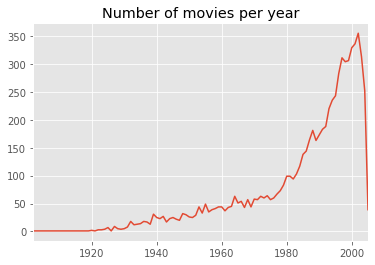

In [29]:
per_year.plot(title = "Number of movies per year" )

### Task 2.10: Yearly average


In [32]:
# your code goes here
plots_averag = major_movies.groupby(['year']).mean()['rating']

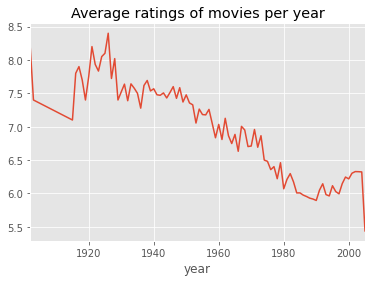

In [33]:
#Plot
plots_averag.plot(title = "Average ratings of movies per year")


### Task 2.11: Explore and Interpret

Here I try to make sense of if older movies were better?.

Are there differences between the rating of major movies and all movies over time? 


**Interpretation**: Based on the data we have plotted, it still cannot be conclusive that older movies are better than average films, due to the fact that movies were substantially prevelant within the last 2 decades of the day, which could then possibly increase the risk of producing poorly rated films since there is so much push to produce films.

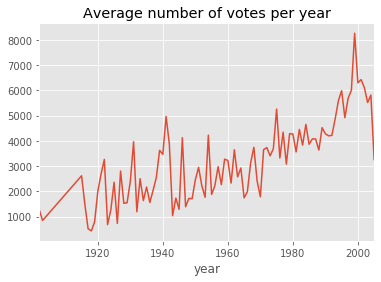

In [390]:
voting = major_movies.groupby(['year']).mean()['votes']

voting.plot(title = "Average number of votes per year")

<b> Interpretation: </b> As suspected from the previous interpretation, the average vote average per year increased overall, which can potentially bring about rating movies poorly.

In [399]:
length = major_movies.groupby(['year']).mean()['length']

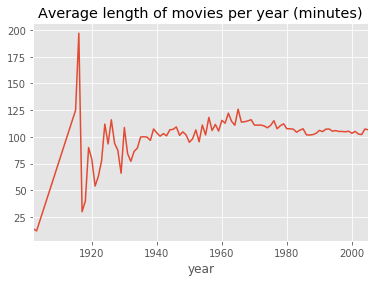

In [406]:
length.plot(title = "Average length of movies per year (minutes)")

<b> Interpretation: </b> Average length of movies over time would be an interesting dynamic to include as for a reason why ratings have gone down. Maybe the demographics would have preferred lengthy films because those films potentially dont leave the audience wondering.